# Shifting Demographics: Tracing changes in immigrants from non-western countries from 2019 to 2029

**How has the number of immigrants from non-western countries in Denmark developed from 2019 to 2020?**

In 2019, Denmark was home to 250,000 non-Western immigrants, marking them as a significant portion of the national demographic fabric. Following the Russia-Ukraine conflict, we anticipate a substantial influx of Ukrainian immigrants, further amplifying the presence of non-Western individuals within the country together with the evolution of non-western immigrants to be mainly caused by the evolution of ukranians.

This expected increase must have a big impact in the danish society as well as the social costs. Therefore, we analyse the evolution of non-Western immigrant numbers from 2019 to 2024. By merging two datasets from Denmark Statistics, we aim not only to chart the historical trajectory but also to forecast the future trends of non-Western immigration into Denmark up until 2029, providing invaluable insights into the changing dynamics of the Danish population.

FRDK123 samt BEF5.

Husk at fratrække forskellen fra det forventede antal i 2024 og det faktiske antal i 2024 i alle årene

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

In [151]:
# The DST API wrapper
%pip install git+https://github.com/alemartinello/dstapi

  Cloning https://github.com/alemartinello/dstapi to /private/var/folders/zm/rfgg6l317lz78jtv53rh8g240000gn/T/pip-req-build-8eu3f0ek
  Running command git clone --filter=blob:none --quiet https://github.com/alemartinello/dstapi /private/var/folders/zm/rfgg6l317lz78jtv53rh8g240000gn/T/pip-req-build-8eu3f0ek
  Resolved https://github.com/alemartinello/dstapi to commit d9eeb5a82cbc70b7d63b2ff44d92632fd77123a4
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [152]:
# A wrapper for multiple APIs with a pandas interface
%pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


Imports and set magics:

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Read and clean data

We start off by importing the two data sets from Denmark Statistics, statistikbanken.dk:

**1. FOLK1E**: *Population on the 1st of the quarter by area, gender, age, and origin.* We use this data-set so we can sort it by non-western immigrants. 


**FRDK123**: *Population projection 2023 for the entire country by origin, gender, and age*. We can deceompose the projection so we only look at non-western immigrants.

We import **FOLK1E** and **FRDK123**, both as API-files.

## 1.1) FOLK1E

In [533]:
FOLK = DstApi('FOLK1E')

In [534]:
tabsum = FOLK.tablesummary(language='en')
display(tabsum)

Table FOLK1E: Population at the first day of the quarter by region, sex, age, ancestry and time
Last update: 2024-02-12T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,OMRÅDE,105,000,All Denmark,851,Aalborg,False
1,KØN,3,TOT,Total,2,Women,False
2,ALDER,127,IALT,"Age, total",125,125 years,False
3,HERKOMST,6,TOT,Total,35,Descendants from non-western countries,False
4,Tid,65,2008K1,2008Q1,2024K1,2024Q1,True


**I want the following for each variable:**

0. *OMRÅDE* to be All Denmark (Code **000**)
1. *KØN* to be Total (Code **TOT**)
2. *Alder* to be all ages from 1-105, where i sum over the ages from 105-125
3. *HERKOMST* to be Immigrants from non-western countries (Code **25**)
4. *Tid* to be the years from 2019-2024, where i only look at the first quarters 


I see that the data contains 5 different variables. I want to sort the data, but in order to see which value the variables can take, i use the code below for the variables:

In [535]:
params = FOLK._define_base_params(language='en')
params['variables'][0]['values'] = ['000']
params['variables'][1]['values'] = ['TOT']
#params['variables'][2]['values'] = ['']
params['variables'][3]['values'] = ['25']
#params['variables'][4]['values'] = ['2019-2024']


POP = FOLK.get_data(params=params)
# Remove " years" in variable "ALDER" and convert to string
POP['ALDER'] = POP['ALDER'].str.replace(" years", "").astype(str)
POP['ALDER'] = POP['ALDER'].str.replace(" year", "").astype(str)


In [536]:
# Keep only entries from the first quarter of each year
POP = POP[POP['TID'].str.endswith('Q1')]

# Extract the year from 'TID' and convert to integer
POP['TID'] = POP['TID'].str.extract('(\d+)').astype(int)

# Sort the DataFrame by 'TID' after modifying it
POP = POP.sort_values('TID')

# Check the DataFrame head to ensure it looks correct
POP.head(40)


,OMRÅDE,KØN,ALDER,HERKOMST,TID,INDHOLD
0,All Denmark,Total,0,Immigrants from non-western countries,2008,98
75,All Denmark,Total,75,Immigrants from non-western countries,2008,569
74,All Denmark,Total,74,Immigrants from non-western countries,2008,572
73,All Denmark,Total,73,Immigrants from non-western countries,2008,583
72,All Denmark,Total,72,Immigrants from non-western countries,2008,715
71,All Denmark,Total,71,Immigrants from non-western countries,2008,715
70,All Denmark,Total,70,Immigrants from non-western countries,2008,786
69,All Denmark,Total,7,Immigrants from non-western countries,2008,685
68,All Denmark,Total,69,Immigrants from non-western countries,2008,876
67,All Denmark,Total,68,Immigrants from non-western countries,2008,969


Now that we have looked at the years up until 2024 in my first dataset **pop** we will take look at the population projection in the CSV file ***FRDK123***.

## 1.2) FRDK123

In [530]:
FRDK = DstApi('FRDK123')
tabsum = FRDK.tablesummary(language='en')
display(tabsum)

Table FRDK123: Population projections 2023 for the country by ancestry, sex, age and time
Last update: 2023-06-01T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,HERKOMST,5,999,Persons of danish origin,35,Descendants from non-western countries,False
1,KØN,2,M,Men,K,Women,False
2,ALDER,106,0,0 years,105-,105 years and over,False
3,Tid,48,2023,2023,2070,2070,True


**We want the following for each variable:**

0. *HERKOMST* to be All Denmark (Code **25**)
2. *Alder* to be all ages from 1-105
4. *Tid* to be the years from 2024-2029, which is not given in quarters, but years:


In [531]:
params = FRDK._define_base_params(language='en')
params['variables'][0]['values'] = ['25']
params['variables'][3]['values'] = ['2024', '2025', '2026', '2027', '2028', '2029']

PROJ = FRDK.get_data(params=params)
# Remove " years" in variable "ALDER" and convert to string
PROJ['ALDER'] = PROJ['ALDER'].str.replace(" years", "").astype(str)
PROJ['ALDER'] = PROJ['ALDER'].str.replace(" year", "").astype(str)
PROJ.head()

,HERKOMST,KØN,ALDER,TID,INDHOLD
0,Immigrants from non-western countries,Women,0,2024,55
1,Immigrants from non-western countries,Women,1,2024,261
2,Immigrants from non-western countries,Women,10,2024,1407
3,Immigrants from non-western countries,Women,100,2024,6
4,Immigrants from non-western countries,Women,101,2024,2


I want to sum women and men for each value of *ALDER* for each value of *TID*, so instead of having the values seperated by gender, i have them in total.

In [515]:
# Group the data by 'ALDER' and 'TID' and sum 'INDHOLD'
PROJ = proj.groupby(['ALDER', 'TID'], as_index=False)['INDHOLD'].sum()

# Assign a new 'KØN' column with the value 'Total' to the aggregated result
PROJ['KØN'] = 'Total'

# Now total_proj will have the total 'INDHOLD' for each 'ALDER' and 'TID' without separating by 'KØN'
PROJ.head()

,ALDER,TID,INDHOLD,KØN
0,0,2024,118,Total
1,0,2025,76,Total
2,0,2026,76,Total
3,0,2027,76,Total
4,0,2028,76,Total


We have now turned the two datasets, ***FOLK1E*** and ***FRDK123*** from Statistics Denmark into two new DataFrames, ***POP*** and ***PROJ***. We are now ready to explore the datasets further

# 2. Explore each data set

## 2.1) Exploring ***POP***

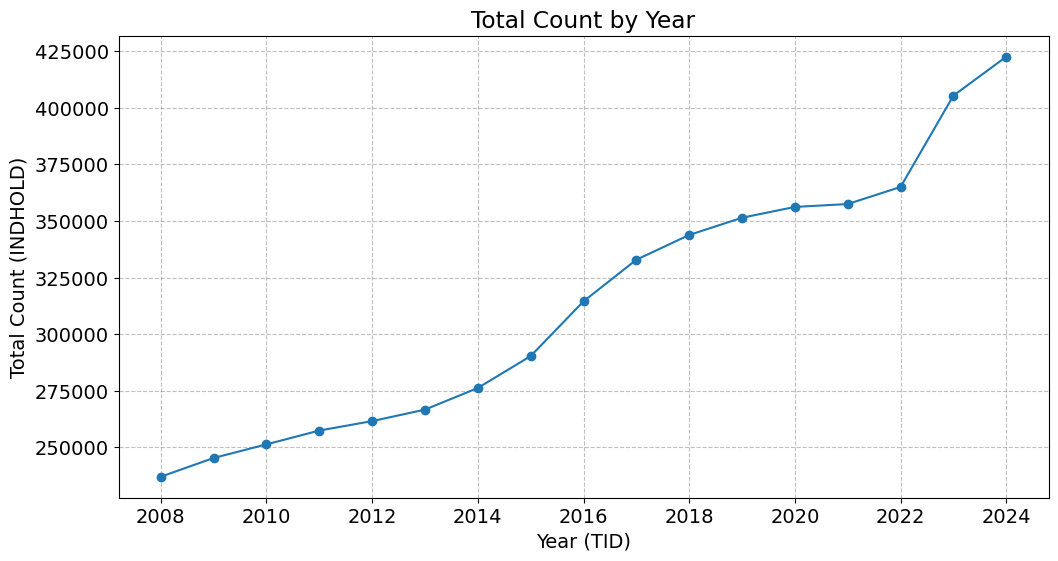

In [537]:
# Filter for the rows where 'ALDER' is 'Age, total'
age_total = POP['ALDER'] == 'Age, total'  # Replace 'Age, total' with the actual value from your data
POP_age_total = POP[age_total]

# Assuming you've already filtered by 'TID' to include only the first quarter years as earlier
plt.figure(figsize=(12, 6))
plt.plot(pop_age_total['TID'], pop_age_total['INDHOLD'], '-o')  # Line with circle markers
plt.title('Total Count by Year')
plt.xlabel('Year (TID)')
plt.ylabel('Total Count (INDHOLD)')
plt.grid(True)
plt.show()

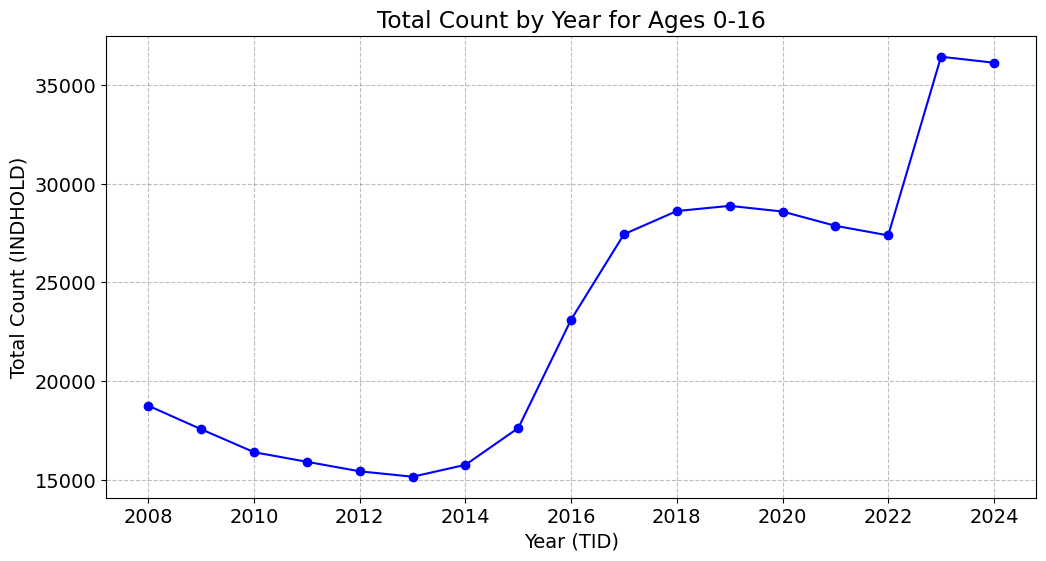

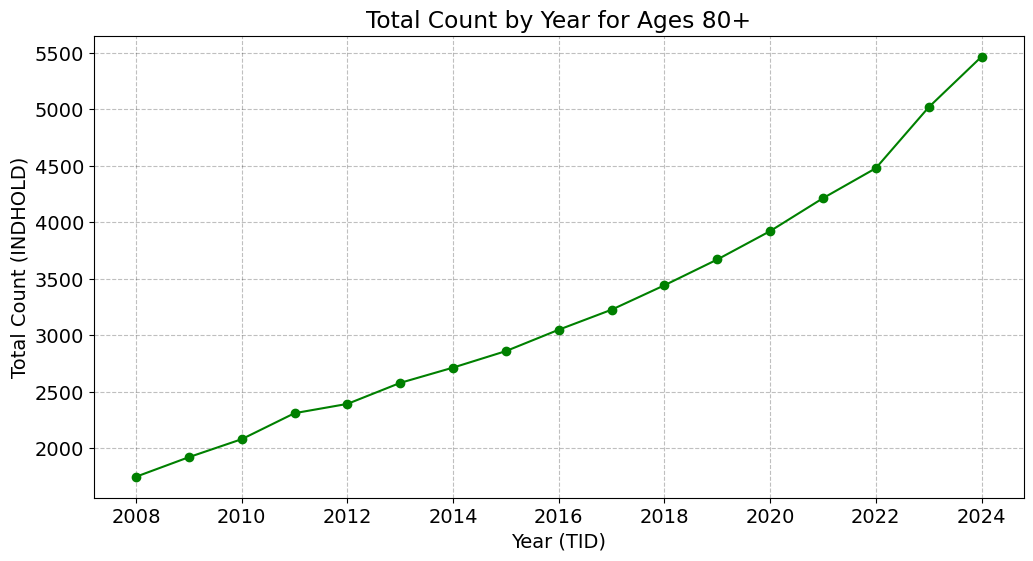

In [546]:
import matplotlib.pyplot as plt

# Ensure 'ALDER' is already converted to the correct format as per previous instructions

# Define the age ranges, directly as strings
young_age_range = [str(age) for age in range(0, 17)]  # 0-16 years
# For senior ages, add the specific string that represents ages 105 and above if it exists in your dataset
senior_age_range = [str(age) for age in range(80, 106)] + ['105 and above']

# Filter the dataframe for the young age range and group by 'TID'
young_totals = POP[POP['ALDER'].isin(young_age_range)].groupby('TID')['INDHOLD'].sum().reset_index()

# Filter the dataframe for the senior age range and group by 'TID'
senior_totals = POP[POP['ALDER'].isin(senior_age_range)].groupby('TID')['INDHOLD'].sum().reset_index()

# Plot for young age range
plt.figure(figsize=(12, 6))
plt.plot(young_totals['TID'], young_totals['INDHOLD'], '-o', color='blue')
plt.title('Total Count by Year for Ages 0-16')
plt.xlabel('Year (TID)')
plt.ylabel('Total Count (INDHOLD)')
plt.grid(True)
plt.show()

# Plot for senior age range
plt.figure(figsize=(12, 6))
plt.plot(senior_totals['TID'], senior_totals['INDHOLD'], '-o', color='green')
plt.title('Total Count by Year for Ages 80+')
plt.xlabel('Year (TID)')
plt.ylabel('Total Count (INDHOLD)')
plt.grid(True)
plt.show()


In [539]:
print(POP['ALDER'].unique())

['0' '75' '74' '73' '72' '71' '70' '7' '69' '68' '67' '77' '66' '64' '63'
 '62' '61' '60' '6' '59' '58' '57' '56' '65' '55' '78' '8' 'Age, total'
 '99' '98' '97' '96' '95' '94' '93' '92' '91' '79' '90' '89' '88' '87'
 '86' '85' '84' '83' '82' '81' '80' '9' '54' '76' '52' '28' '27' '26' '25'
 '24' '23' '22' '21' '20' '2' '19' '18' '17' '16' '15' '14' '13' '12' '11'
 '101' '100' '10' '53' '29' '3' '1' '46' '51' '50' '5' '49' '48' '47' '30'
 '45' '44' '43' '41' '42' '4' '39' '38' '37' '36' '35' '34' '33' '32' '31'
 '40' '102' '103' '104' '105' '106' '107' '108' '109' '110' '111' '112']


## 2.1) Exploring ***PROJ***

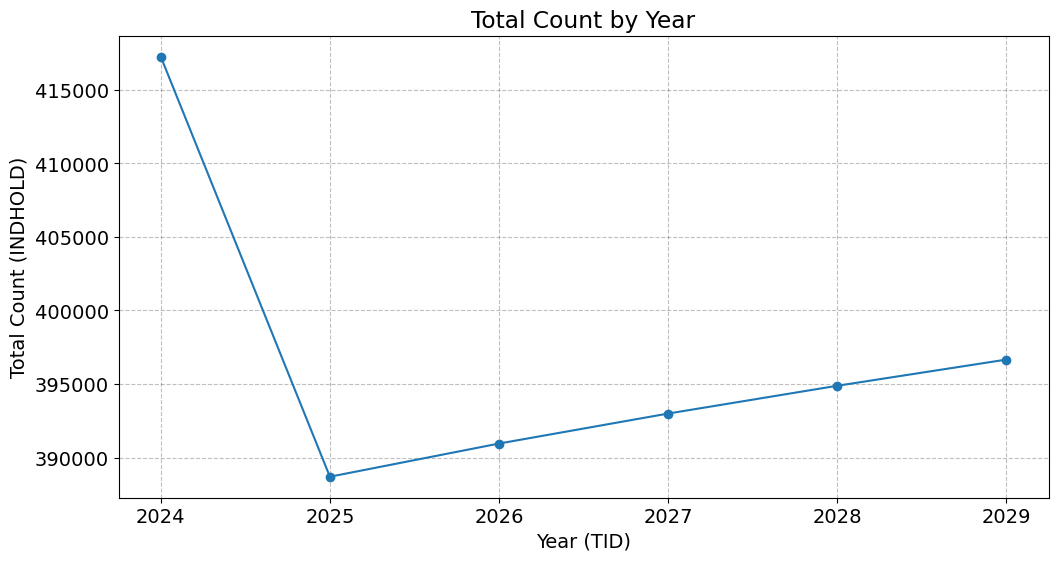

In [544]:
import matplotlib.pyplot as plt

# Group by 'TID' and sum 'INDHOLD' to get the total for each year
yearly_totals = PROJ.groupby('TID')['INDHOLD'].sum().reset_index()

# Now plot this data
plt.figure(figsize=(12, 6))
plt.plot(yearly_totals['TID'], yearly_totals['INDHOLD'], '-o')  # Line with circle markers
plt.title('Total Count by Year')
plt.xlabel('Year (TID)')
plt.ylabel('Total Count (INDHOLD)')
plt.grid(True)
plt.show()


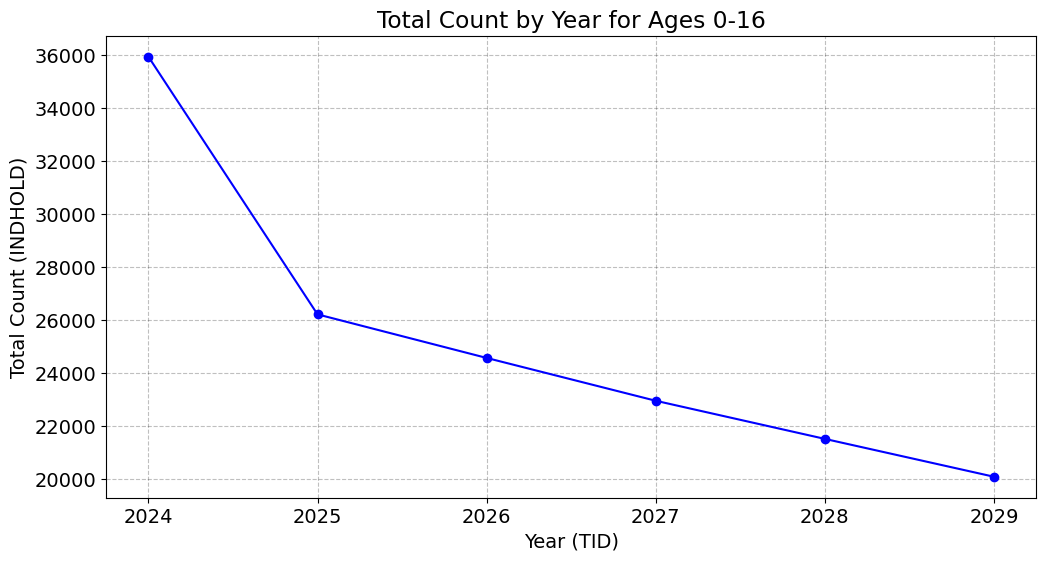

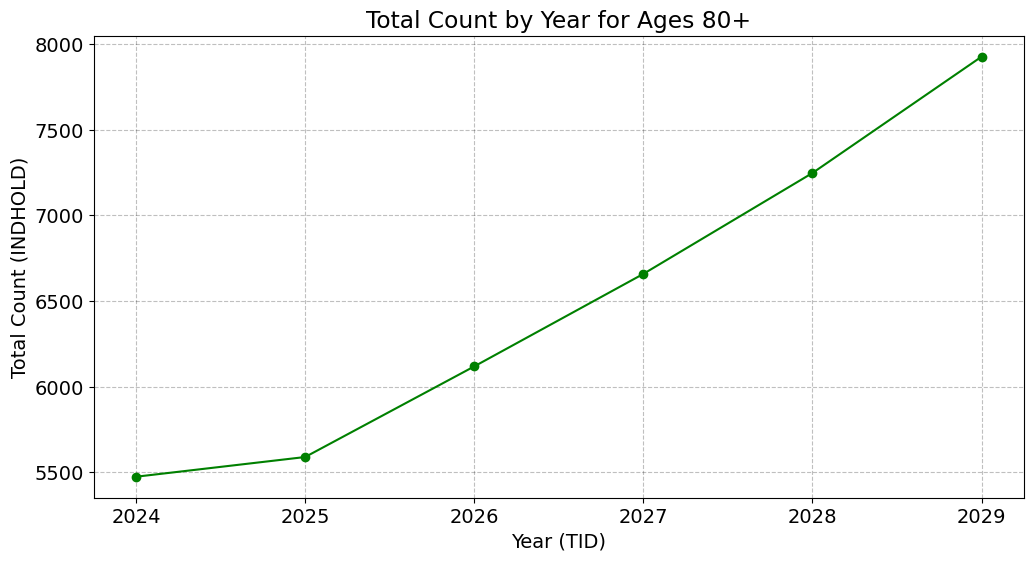

In [545]:
import matplotlib.pyplot as plt

# Ensure 'ALDER' is already converted to the correct format as per previous instructions

# Define the age ranges, directly as strings
young_age_range = [str(age) for age in range(0, 17)]  # 0-16 years
# For senior ages, add the specific string that represents ages 105 and above if it exists in your dataset
senior_age_range = [str(age) for age in range(80, 106)] + ['105 and above']

# Filter the dataframe for the young age range and group by 'TID'
young_totals = PROJ[PROJ['ALDER'].isin(young_age_range)].groupby('TID')['INDHOLD'].sum().reset_index()

# Filter the dataframe for the senior age range and group by 'TID'
senior_totals = PROJ[PROJ['ALDER'].isin(senior_age_range)].groupby('TID')['INDHOLD'].sum().reset_index()

# Plot for young age range
plt.figure(figsize=(12, 6))
plt.plot(young_totals['TID'], young_totals['INDHOLD'], '-o', color='blue')
plt.title('Total Count by Year for Ages 0-16')
plt.xlabel('Year (TID)')
plt.ylabel('Total Count (INDHOLD)')
plt.grid(True)
plt.show()

# Plot for senior age range
plt.figure(figsize=(12, 6))
plt.plot(senior_totals['TID'], senior_totals['INDHOLD'], '-o', color='green')
plt.title('Total Count by Year for Ages 80+')
plt.xlabel('Year (TID)')
plt.ylabel('Total Count (INDHOLD)')
plt.grid(True)
plt.show()


In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [122]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

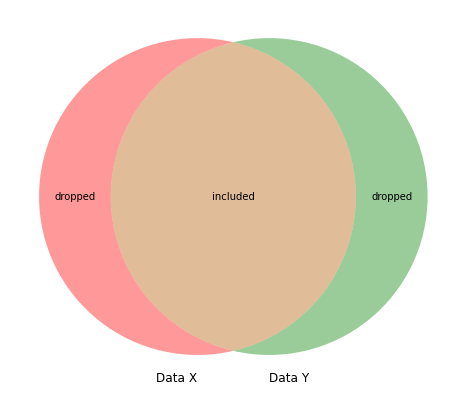

In [3]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

Hvis vi er seje kan vi eventuelt finde en tabel over enhedsomkostningerne pr individ og kigge på hvor dyrt de bliver at der kommer flere ukrainere til.

Dernæst er en virkelig vigtig pointe, at der sker et stort fald i 2025 af ikke-vestlige indvandrere. Det her skyldes udelukkende, at ukrainerne forventes at tage hjem igen fordi særloven ophører. Jeg skal nok finde dokumentation på det.

# Conclusion

ADD CONCISE CONLUSION.